In [1]:
###############################
# Model Machine with FLAME    #
###############################
# 7APRIL2020: crispd
###############################
#CONTENTS:
# Import modules
# Setup working directory, and necessary latfile handle
# Setup 'machine' and 'state'
# Setup 'observers', run model, plot envelope
# Output device values used in model

In [14]:
import os
from pathlib import Path
#from flame import Machine
import flame
from flame import Machine #Machine() not found without this line
import flame_utils
import numpy as np
import matplotlib.pyplot as plt
import labframePlotFun
%matplotlib inline
#%matplotlib qt #for showing graphs in second window

In [112]:
#
# Set-up working directory, and lattice file handle
#

# current working dir
cwd = os.getcwd()

# locate phantasy-machines, and flame (if not found, search rea-files parent directory, or rea3/data/CrispAnalysis/phantasy-machines)
flamedir = os.path.dirname(os.path.abspath(flame.__file__))
if os.path.isfile(flamedir):
    flamedata = flamedir + '/data'
    os.unlink(cwd + '/data')
    os.symlink(flamedata, cwd + '/data')

# define latfile
latfile = "baseline_gpl_fully_corrected.lat"
latpath = str(Path(cwd).parent) + '/phantasy-machines/ReA/GPL/' + latfile
print(latpath)
latfile_handle = open(latpath, 'rb')

/projects/rea3/data/CrispAnalysis/phantasy-machines/ReA/GPL/baseline_gpl_fully_corrected.lat


In [113]:
# create FLAME machine
m = Machine(latfile_handle)

# create BeamState object
bs = flame_utils.BeamState(machine=m)

# create ModelFlame object
fm = flame_utils.ModelFlame()

[2020-03-30T20:22:42.271] WARNING: flame_utils.core.model: ModelFlame: Lattice file is not valid, do it manually.


In [114]:
# setup machine and state
fm.bmstate, fm.machine = bs, m

In [115]:
# setup observers and run flame model
#obs = fm.get_index_by_type(type='bpm')['bpm']
#obs = fm.get_index_by_type(type='marker')['marker']
obs = range(len(fm.machine))
r,s = fm.run(monitor=obs)

# get data of interest from running results
data = fm.collect_data(r, pos=True, x0_env=True, x0_rms=True, y0_env=True, y0_rms=True, ref_IonEk=True)

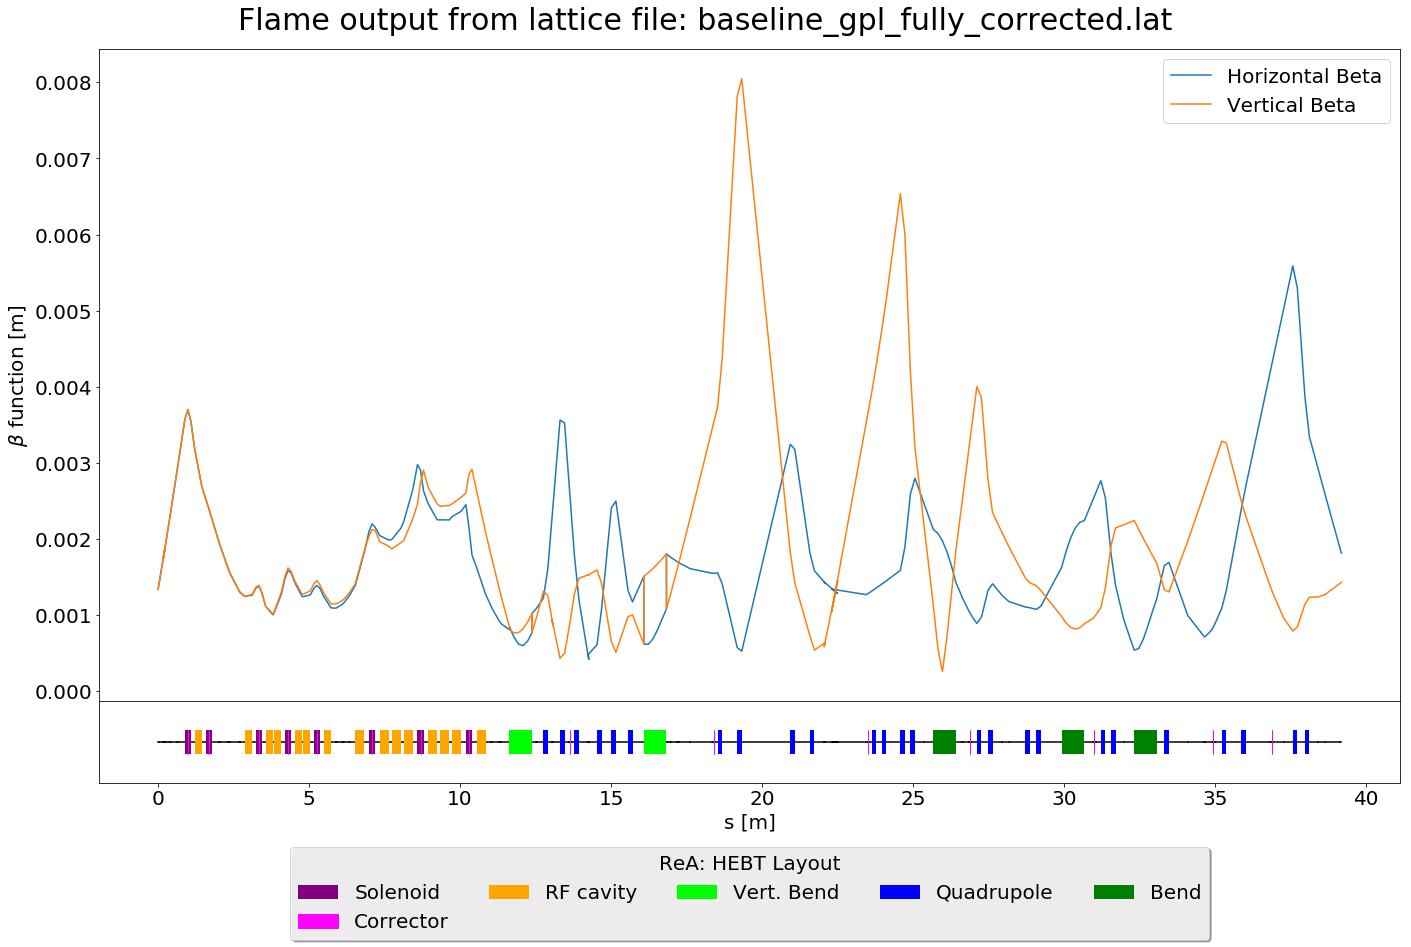

In [116]:
# Create, and show plot of beam envelope
plt.rcParams['font.size'] = 20
plt.rcParams['figure.figsize'] = [20,12]
fig,(ax1,ax2)=plt.subplots(2, 1,gridspec_kw = {'height_ratios':[8,1]}, sharex=True)
fig.suptitle('Flame output from lattice file: ' + latfile, fontsize=30)

ax2,xmin,xmax,ymin,ymax = labframePlotFun.labframePlot(latpath, ax2, 0)
ax2.set_ylim([-1.0,1.0])
plt.setp(ax2, yticks=[])

ax1.plot(data['pos'], data['x0_rms']/1000.0, label='Horizontal Beta')
ax1.plot(data['pos'], data['y0_rms']/1000.0, label='Vertical Beta')
ax2.set_xlabel('s [m]')
ax1.set_ylabel(r'$\beta$ function [m]')
ax1.legend(loc='best')

fig.tight_layout(rect=(0,0,1,0.96))
plt.subplots_adjust(hspace=0.0)
plt.show()

# or use plot_orbit function...
#from phantasy.tools import plot_orbit
#plot_orbit(('pos', 'xrms'), ('pos', 'yrms'), flame_model=fm)

In [120]:
#
# Outputting values from flame machine' model 'm' as list [[name, field],[],...]
#

sols  = m.find(type='solenoid')
cors  = m.find(type='orbtrim')
cavs  = m.find(type='rfcavity')
quads = m.find(type='quadrupole')

devs = sols + cors + cavs + quads

#devs = m.find(type=['solenoid', 'orbtrim', 'rfcavity', 'quadrupole'])
devs.sort()

tune = {}
type_to_key = { 'solenoid':'B',
               'orbtrim':'theta_x',
               'rfcavity':'scl_fac',
               'quadrupole':'B2'}
for i in devs:
    name     = m.conf(i)['name']
    if '_1' in name: name = name[0:len(name)-2]
    dev_type = m.conf(i)['type']
    field_key = type_to_key[dev_type]
    #print(str(i) + ", " + name + ", " + dev_type)
    
    if "ROT" in name or '_2' in name:
        print("Invalid: " + name)
    else:
        try:
            field = m.conf(i)[field_key]
        except KeyError:
            field_key = 'theta_y'
            field = m.conf(i)[field_key]
    
    if field: tune[i]  = { 'name'      : name,
                           'type'      : dev_type,
                           'field'     : field,
                           'field_key' : field_key}
    name = ''
    dev_type = ''
    field = 0
        
listed_tune = []
for i in devs:
    try:
        name = tune[i]['name']
        field = str(tune[i]['field'])
        listed_tune.append([name,field])
        #print(name + ", " + field)
    except:
        name=''
        field=''
        
listed_tune

Invalid: REA_CK01:SOL_D1045_2
Invalid: REA_CK01:SOL_D1052_2
Invalid: REA_CL01:SOL_D1069_2
Invalid: REA_CL01:SOL_D1078_2
Invalid: REA_CL01:SOL_D1088_2
Invalid: REA_CM01:SOL_D1106_2
Invalid: REA_CM01:SOL_D1123_2
Invalid: REA_CM01:SOL_D1139_2
Invalid: REA_BTS23:ROT_D1152
Invalid: REA_BTS23:ROT_D1159
Invalid: REA_BTS25:ROT_D1196
Invalid: REA_BTS25:ROT_D1204


[['REA_CK01:SOL_D1045', '2.24906'],
 ['REA_CK01:DCH_D1045', '-2.2259e-05'],
 ['REA_CK01:DCV_D1045', '7.8585e-05'],
 ['REA_CK01:CAV_D1049', '0.119972'],
 ['REA_CK01:SOL_D1052', '0.499623'],
 ['REA_CL01:CAV_D1065', '0.600146'],
 ['REA_CL01:SOL_D1069', '2.7977'],
 ['REA_CL01:DCH_D1069', '0.000916521'],
 ['REA_CL01:DCV_D1069', '0.000158574'],
 ['REA_CL01:CAV_D1072', '0.600506'],
 ['REA_CL01:CAV_D1075', '0.599536'],
 ['REA_CL01:SOL_D1078', '3.20236'],
 ['REA_CL01:CAV_D1082', '0.600259'],
 ['REA_CL01:CAV_D1084', '0.599436'],
 ['REA_CL01:SOL_D1088', '2.99988'],
 ['REA_CL01:DCH_D1088', '9.43051e-05'],
 ['REA_CL01:DCV_D1088', '0.00068675'],
 ['REA_CL01:CAV_D1091', '0.599762'],
 ['REA_CM01:CAV_D1102', '0.669853'],
 ['REA_CM01:SOL_D1106', '3.10289'],
 ['REA_CM01:CAV_D1111', '0.66952'],
 ['REA_CM01:CAV_D1115', '0.670317'],
 ['REA_CM01:CAV_D1118', '0.669603'],
 ['REA_CM01:SOL_D1123', '3.70307'],
 ['REA_CM01:DCH_D1123', '0.000105149'],
 ['REA_CM01:DCV_D1123', '0.00199263'],
 ['REA_CM01:CAV_D1127', '